<a href="https://colab.research.google.com/github/ritwiks9635/Object_Recognition_And_Detection-/blob/main/Brain_Tumor_Detection_YOLOv7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Brain Tumor Object Detection - YOLOv7**

In [ ]:
#https://www.kaggle.com/datasets/davidbroberts/brain-tumor-object-detection-datasets

In [ ]:
!unzip /content/https:/www.kaggle.com/datasets/davidbroberts/brain-tumor-object-detection-datasets/brain-tumor-object-detection-datasets.zip

In [ ]:
import os
import torch
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 2.2.1+cu121 (Tesla T4)


##**Setup YOLOv7**

In [ ]:
! git clone https://github.com/WongKinYiu/yolov7
! cd yolov7
! pip install -r ./yolov7/requirements.txt
! wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt
! cd ../

In [ ]:
os.mkdir('./yolov7/dataset')
os.mkdir('./yolov7/dataset/train')
os.mkdir('./yolov7/dataset/train/images')
os.mkdir('./yolov7/dataset/train/labels')
os.mkdir('./yolov7/dataset/test')
os.mkdir('./yolov7/dataset/test/images')
os.mkdir('./yolov7/dataset/test/labels')

In [ ]:
data_dir = "/content/axial_t1wce_2_class"

train_path = "./yolov7/dataset/train"
test_path = "./yolov7/dataset/test"

In [ ]:
! cp {data_dir}/images/train/* {train_path}/images/
! cp {data_dir}/labels/train/* {train_path}/labels/
! cp {data_dir}/images/test/* {test_path}/images/
! cp {data_dir}/labels/test/* {test_path}/labels/

In [ ]:
train_imgs = os.listdir(train_path + "/images")
test_imgs = os.listdir(test_path + "/images")

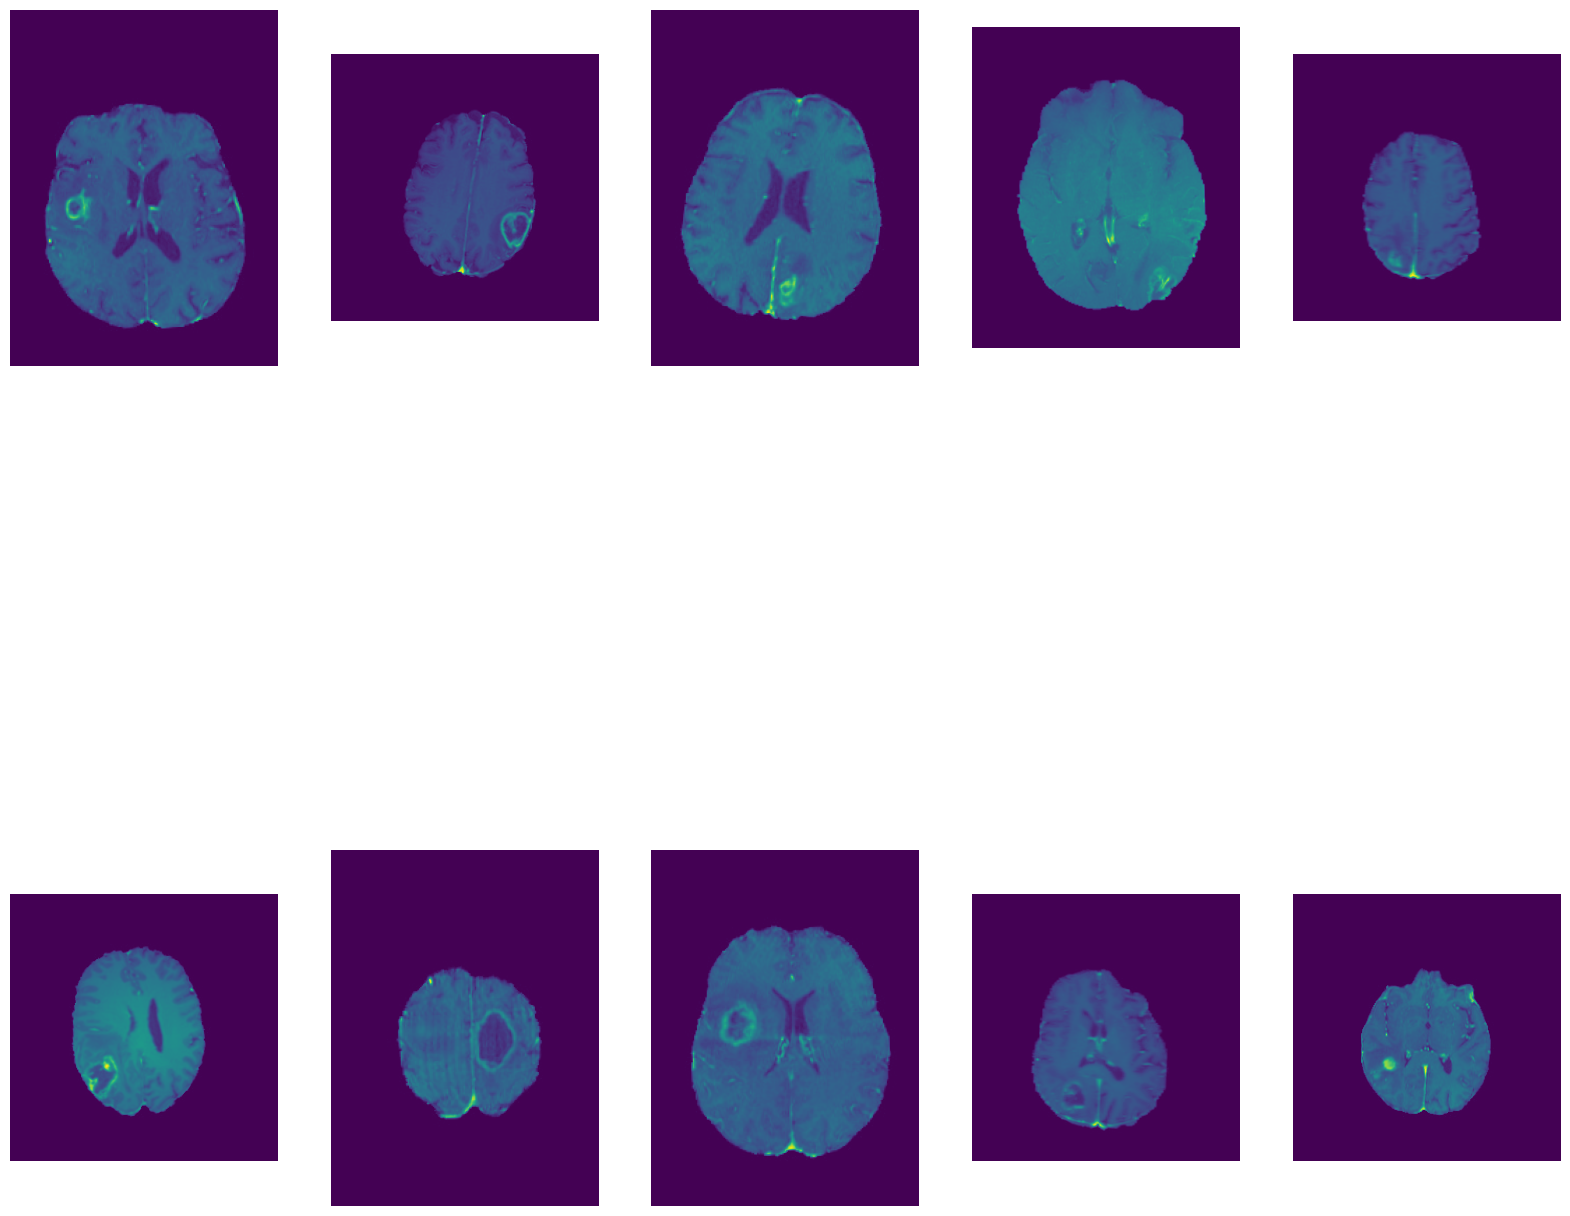

In [ ]:
plt.figure(figsize=(20, 20))
for i, j in enumerate(np.random.randint(0, len(train_imgs), size = 10), start = 1):
    plt.subplot(2, 5, i)
    img = plt.imread(train_path + "/images/" + train_imgs[j])
    plt.imshow(img)
    plt.axis("off")
    #plt.tight_layout()
plt.show()

##**Training**
expand to see coco.yaml file

In [ ]:
text = """
train: ./yolov7/dataset/train
val: ./yolov7/dataset/test

# number of classes
nc: 2

# class names
names: ['negative','positive']
"""
with open("./yolov7/data/coco.yaml", 'w') as file:
    file.write(text)

###**expand to see yolov5.yaml file**

In [ ]:
text = """
# parameters
nc: 2  # number of classes
depth_multiple: 1.0  # model depth multiple
width_multiple: 1.0  # layer channel multiple

# anchors
anchors:
  - [12,16, 19,36, 40,28]  # P3/8
  - [36,75, 76,55, 72,146]  # P4/16
  - [142,110, 192,243, 459,401]  # P5/32

# yolov7 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [32, 3, 1]],  # 0

   [-1, 1, Conv, [64, 3, 2]],  # 1-P1/2
   [-1, 1, Conv, [64, 3, 1]],

   [-1, 1, Conv, [128, 3, 2]],  # 3-P2/4
   [-1, 1, Conv, [64, 1, 1]],
   [-2, 1, Conv, [64, 1, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [[-1, -3, -5, -6], 1, Concat, [1]],
   [-1, 1, Conv, [256, 1, 1]],  # 11

   [-1, 1, MP, []],
   [-1, 1, Conv, [128, 1, 1]],
   [-3, 1, Conv, [128, 1, 1]],
   [-1, 1, Conv, [128, 3, 2]],
   [[-1, -3], 1, Concat, [1]],  # 16-P3/8
   [-1, 1, Conv, [128, 1, 1]],
   [-2, 1, Conv, [128, 1, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [[-1, -3, -5, -6], 1, Concat, [1]],
   [-1, 1, Conv, [512, 1, 1]],  # 24

   [-1, 1, MP, []],
   [-1, 1, Conv, [256, 1, 1]],
   [-3, 1, Conv, [256, 1, 1]],
   [-1, 1, Conv, [256, 3, 2]],
   [[-1, -3], 1, Concat, [1]],  # 29-P4/16
   [-1, 1, Conv, [256, 1, 1]],
   [-2, 1, Conv, [256, 1, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [[-1, -3, -5, -6], 1, Concat, [1]],
   [-1, 1, Conv, [1024, 1, 1]],  # 37

   [-1, 1, MP, []],
   [-1, 1, Conv, [512, 1, 1]],
   [-3, 1, Conv, [512, 1, 1]],
   [-1, 1, Conv, [512, 3, 2]],
   [[-1, -3], 1, Concat, [1]],  # 42-P5/32
   [-1, 1, Conv, [256, 1, 1]],
   [-2, 1, Conv, [256, 1, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [[-1, -3, -5, -6], 1, Concat, [1]],
   [-1, 1, Conv, [1024, 1, 1]],  # 50
  ]

# yolov7 head
head:
  [[-1, 1, SPPCSPC, [512]], # 51

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [37, 1, Conv, [256, 1, 1]], # route backbone P4
   [[-1, -2], 1, Concat, [1]],

   [-1, 1, Conv, [256, 1, 1]],
   [-2, 1, Conv, [256, 1, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [[-1, -2, -3, -4, -5, -6], 1, Concat, [1]],
   [-1, 1, Conv, [256, 1, 1]], # 63

   [-1, 1, Conv, [128, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [24, 1, Conv, [128, 1, 1]], # route backbone P3
   [[-1, -2], 1, Concat, [1]],

   [-1, 1, Conv, [128, 1, 1]],
   [-2, 1, Conv, [128, 1, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [[-1, -2, -3, -4, -5, -6], 1, Concat, [1]],
   [-1, 1, Conv, [128, 1, 1]], # 75

   [-1, 1, MP, []],
   [-1, 1, Conv, [128, 1, 1]],
   [-3, 1, Conv, [128, 1, 1]],
   [-1, 1, Conv, [128, 3, 2]],
   [[-1, -3, 63], 1, Concat, [1]],

   [-1, 1, Conv, [256, 1, 1]],
   [-2, 1, Conv, [256, 1, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [[-1, -2, -3, -4, -5, -6], 1, Concat, [1]],
   [-1, 1, Conv, [256, 1, 1]], # 88

   [-1, 1, MP, []],
   [-1, 1, Conv, [256, 1, 1]],
   [-3, 1, Conv, [256, 1, 1]],
   [-1, 1, Conv, [256, 3, 2]],
   [[-1, -3, 51], 1, Concat, [1]],

   [-1, 1, Conv, [512, 1, 1]],
   [-2, 1, Conv, [512, 1, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [[-1, -2, -3, -4, -5, -6], 1, Concat, [1]],
   [-1, 1, Conv, [512, 1, 1]], # 101

   [75, 1, RepConv, [256, 3, 1]],
   [88, 1, RepConv, [512, 3, 1]],
   [101, 1, RepConv, [1024, 3, 1]],

   [[102,103,104], 1, IDetect, [nc, anchors]],   # Detect(P3, P4, P5)
  ]
"""

with open("./yolov7/cfg/training/yolov7.yaml", 'w') as file:
    file.write(text)

In [ ]:
#!wandb disabled

/bin/bash: line 1: wandb: command not found


In [ ]:
! python ./yolov7/train.py --weights yolov7.pt --cfg ./yolov7/cfg/training/yolov7.yaml --data ./yolov7/data/coco.yaml \
    --batch-size 16 --epochs 100 --img-size 640 640 --hyp ./yolov7/data/hyp.scratch.custom.yaml --name run

In [ ]:
! ls ./runs/train/run

confusion_matrix.png				    results.txt		    train_batch2.jpg
events.out.tfevents.1712593944.8956839377e6.2278.0  test_batch0_labels.jpg  train_batch3.jpg
F1_curve.png					    test_batch0_pred.jpg    train_batch4.jpg
hyp.yaml					    test_batch1_labels.jpg  train_batch5.jpg
opt.yaml					    test_batch1_pred.jpg    train_batch6.jpg
P_curve.png					    test_batch2_labels.jpg  train_batch7.jpg
PR_curve.png					    test_batch2_pred.jpg    train_batch8.jpg
R_curve.png					    train_batch0.jpg	    train_batch9.jpg
results.png					    train_batch1.jpg	    weights


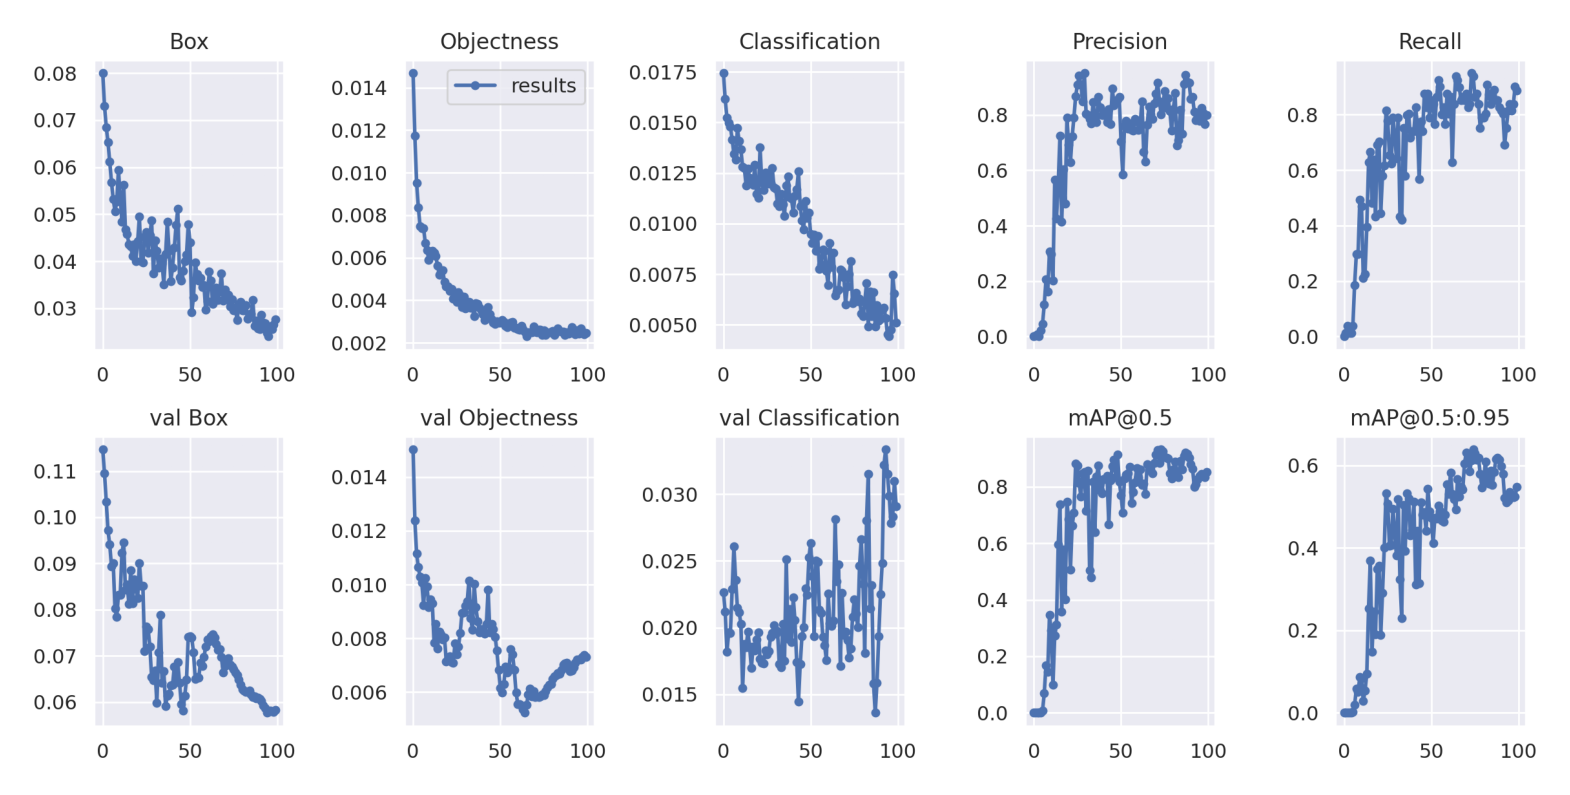

In [ ]:
img = plt.imread('./runs/train/run/results.png')
plt.figure(figsize=(20,15))
plt.imshow(img)
plt.axis('off')
plt.show()

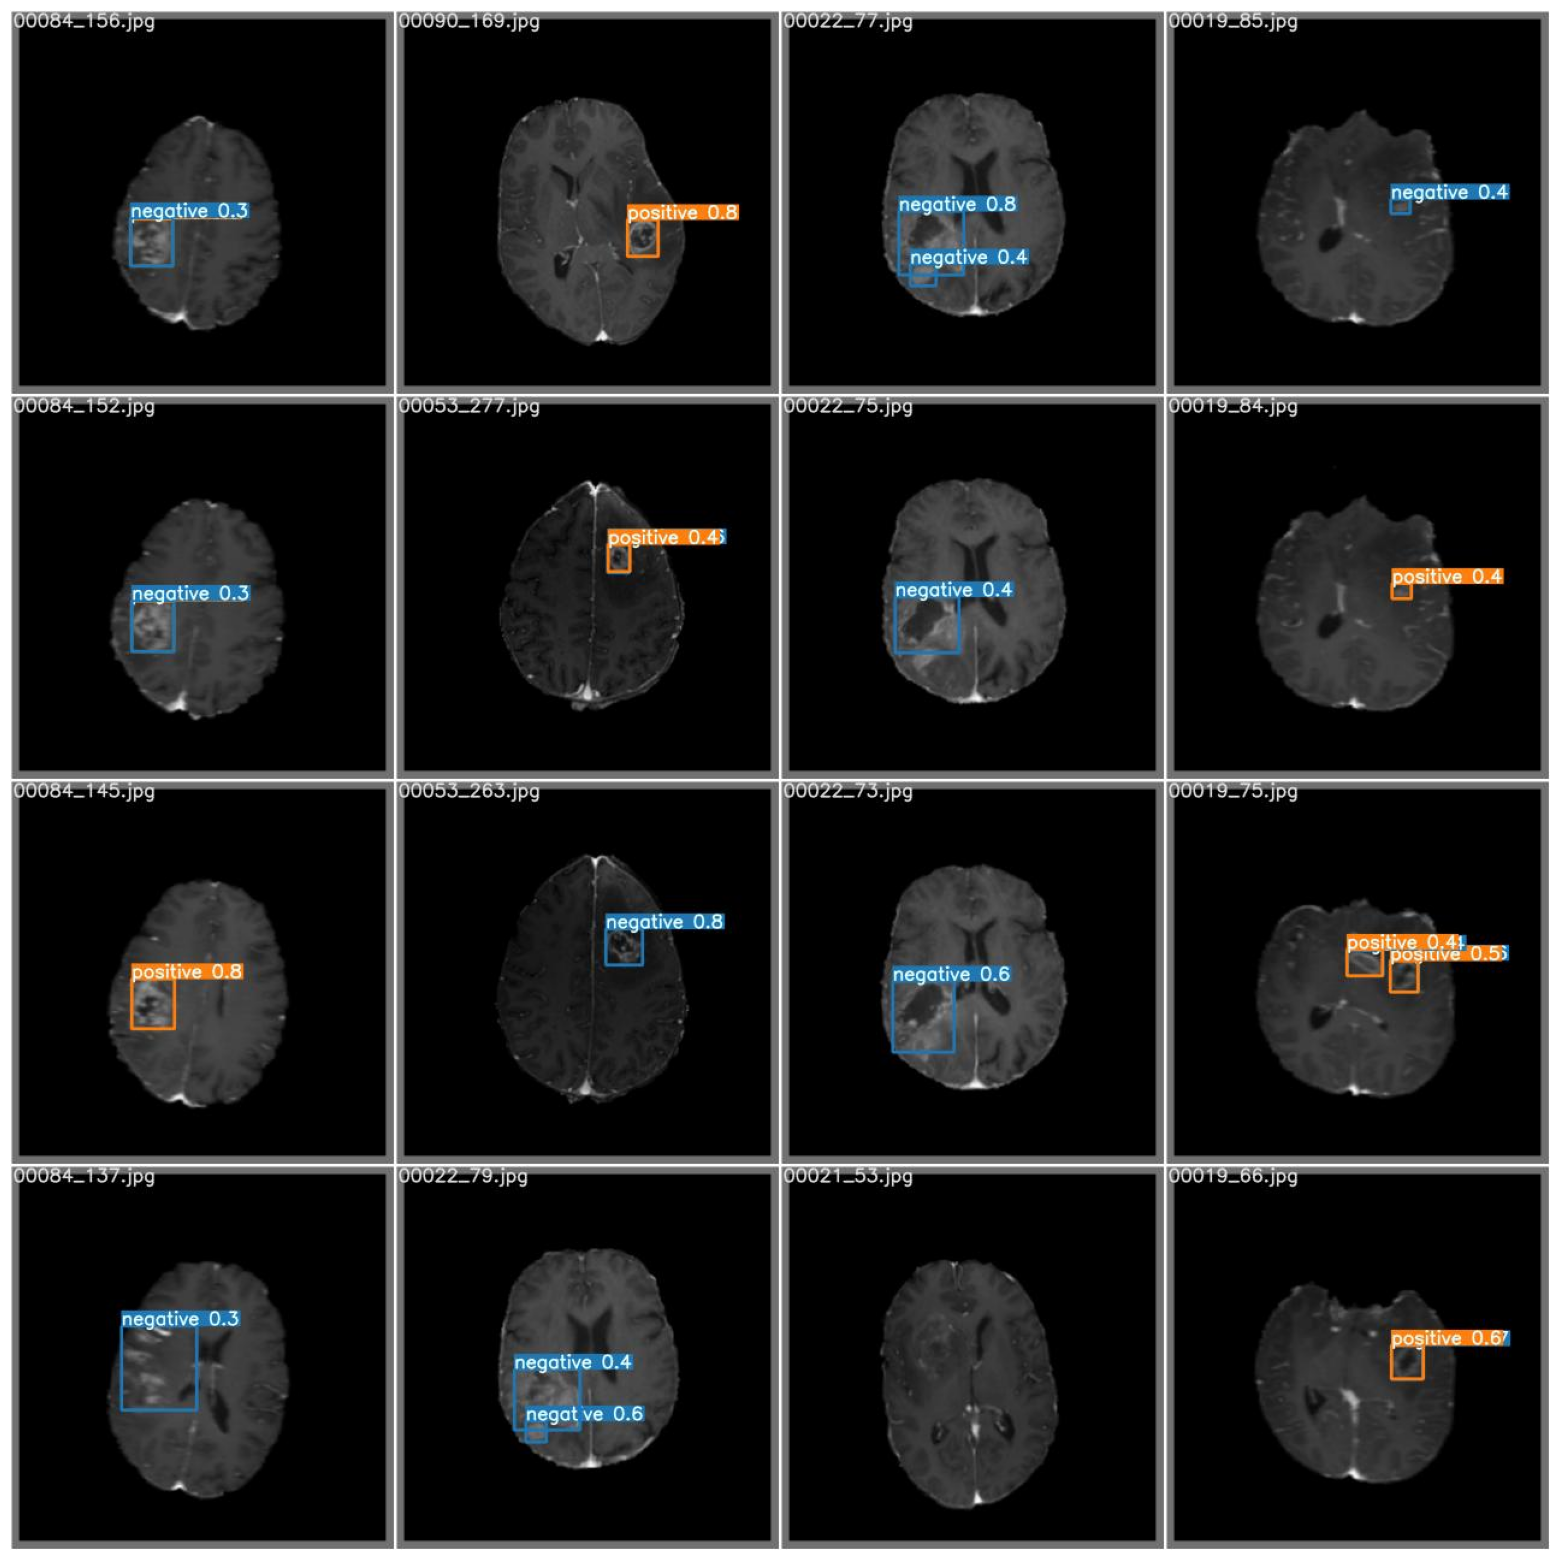

In [ ]:
img = plt.imread('./runs/train/run/test_batch1_pred.jpg')
plt.figure(figsize=(20,20))
plt.imshow(img)
plt.axis('off')
plt.show()

#**Inference**

In [ ]:
img = random.choice(test_imgs)
! python ./yolov7/detect.py  --weights ./runs/train/run/weights/best.pt --conf 0.5 --img-size 640 --source {test_path}/images/{img} --no-trace

Namespace(weights=['./runs/train/run/weights/best.pt'], source='./yolov7/dataset/test/images/00072_66.jpg', img_size=640, conf_thres=0.5, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=True)
YOLOR 🚀 v0.1-128-ga207844 torch 2.2.1+cu121 CUDA:0 (Tesla T4, 15102.0625MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/usr/local/lib/python3.10/dist-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36487166 parameters, 6194944 gradients, 103.2 GFLOPS
1 positive, Done. (22.3ms) Inference, (623.3ms) NMS
 The image wi

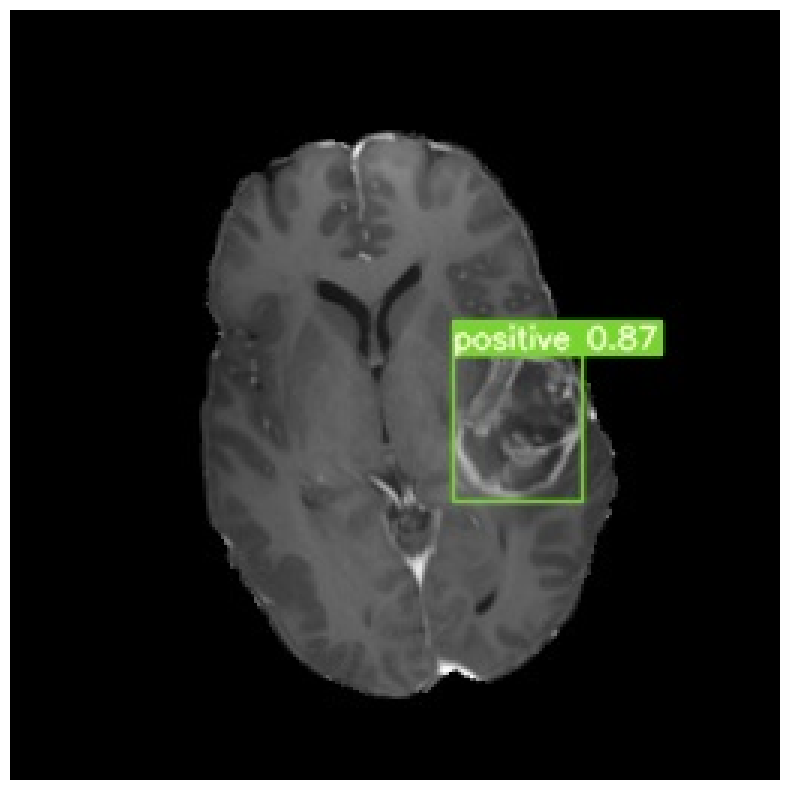

In [ ]:
plt.figure(figsize=(10,10))
im = plt.imread('./runs/detect/exp3/00072_66.jpg')
plt.axis('off')
plt.imshow(im)